In [36]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import kurtosis
from scipy.stats import skew
import researchpy as rp
from scipy import stats

# 1. Загрузить файл auto.csv

In [37]:
data = pd.read_csv('auto.csv')
data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,164,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,164,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,164,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


# 2. Рассчитать основные статистики для переменных(среднее, медиана, мода, мин/макс, сред. отклонение)

In [38]:
data.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,126.365854,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.324878,3.253366,10.142537,106.048780,5131.463415,25.219512,30.751220,13312.712195
std,1.245307,35.438400,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.273049,0.313937,3.972040,43.468803,480.933330,6.542142,6.886443,8102.472461
min,-2.000000,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,101.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.130000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,1.000000,122.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,150.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,120.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,256.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


# 3. Рассчитать и визуализировать корреляционную матрицу для переменных

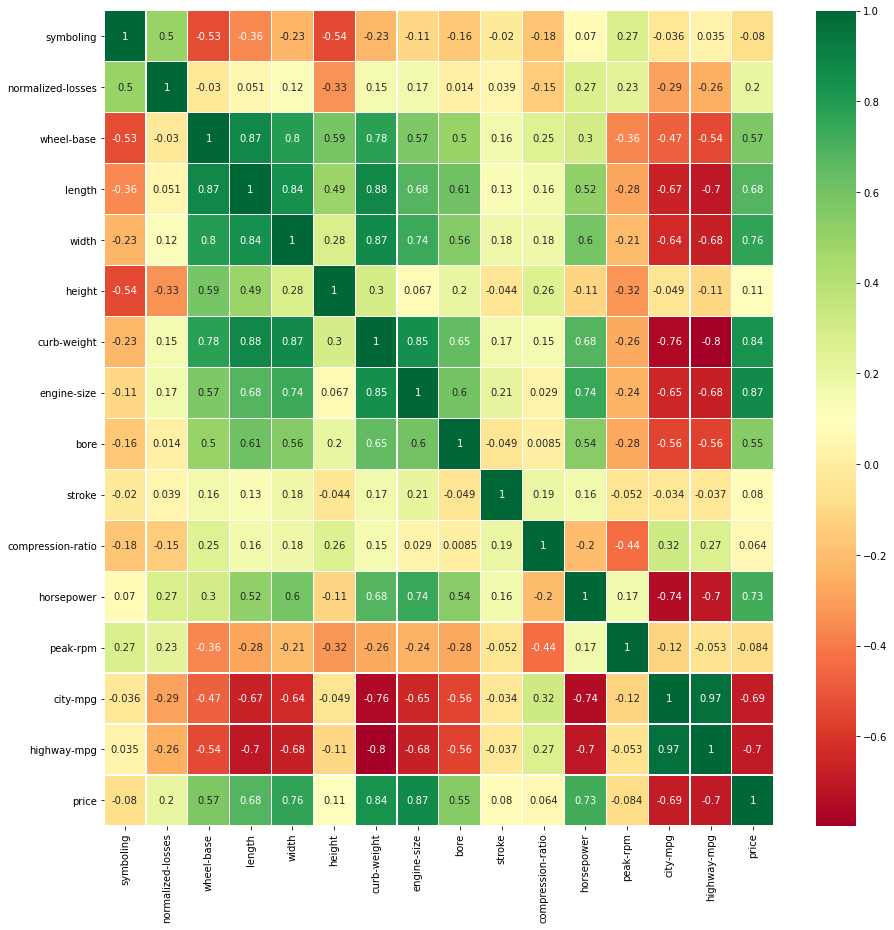

In [39]:
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(15,15)
plt.show()

# 4. Визуализировать распределение переменной ‘Price’, рассчитать показатели skewness и kurtosis

In [40]:
price = data['price']
horsepower = data['horsepower']

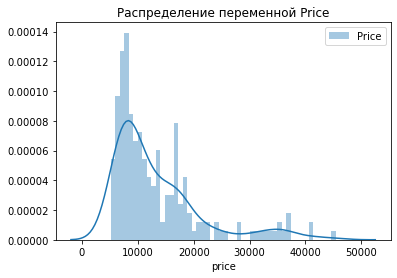

In [41]:
sns.distplot(price, 50)
plt.title('Распределение переменной Price')
plt.legend(['Price'])
plt.show()

In [42]:
print( 'excess kurtosis of normal distribution (should be 0): {}'.format( kurtosis(price) ))
print( 'skewness of normal distribution (should be 0): {}'.format( skew(price) ))

excess kurtosis of normal distribution (should be 0): 2.848082544390688
skewness of normal distribution (should be 0): 1.7534486514523662


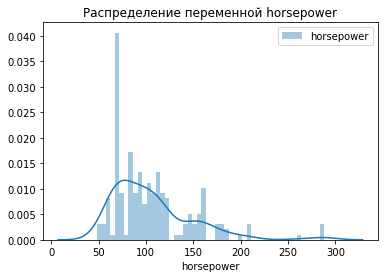

In [43]:
sns.distplot(horsepower, 50)
plt.title('Распределение переменной horsepower')
plt.legend(['horsepower'])
plt.show()

# 5. Визуализировать несколько взаимосвязей между переменными

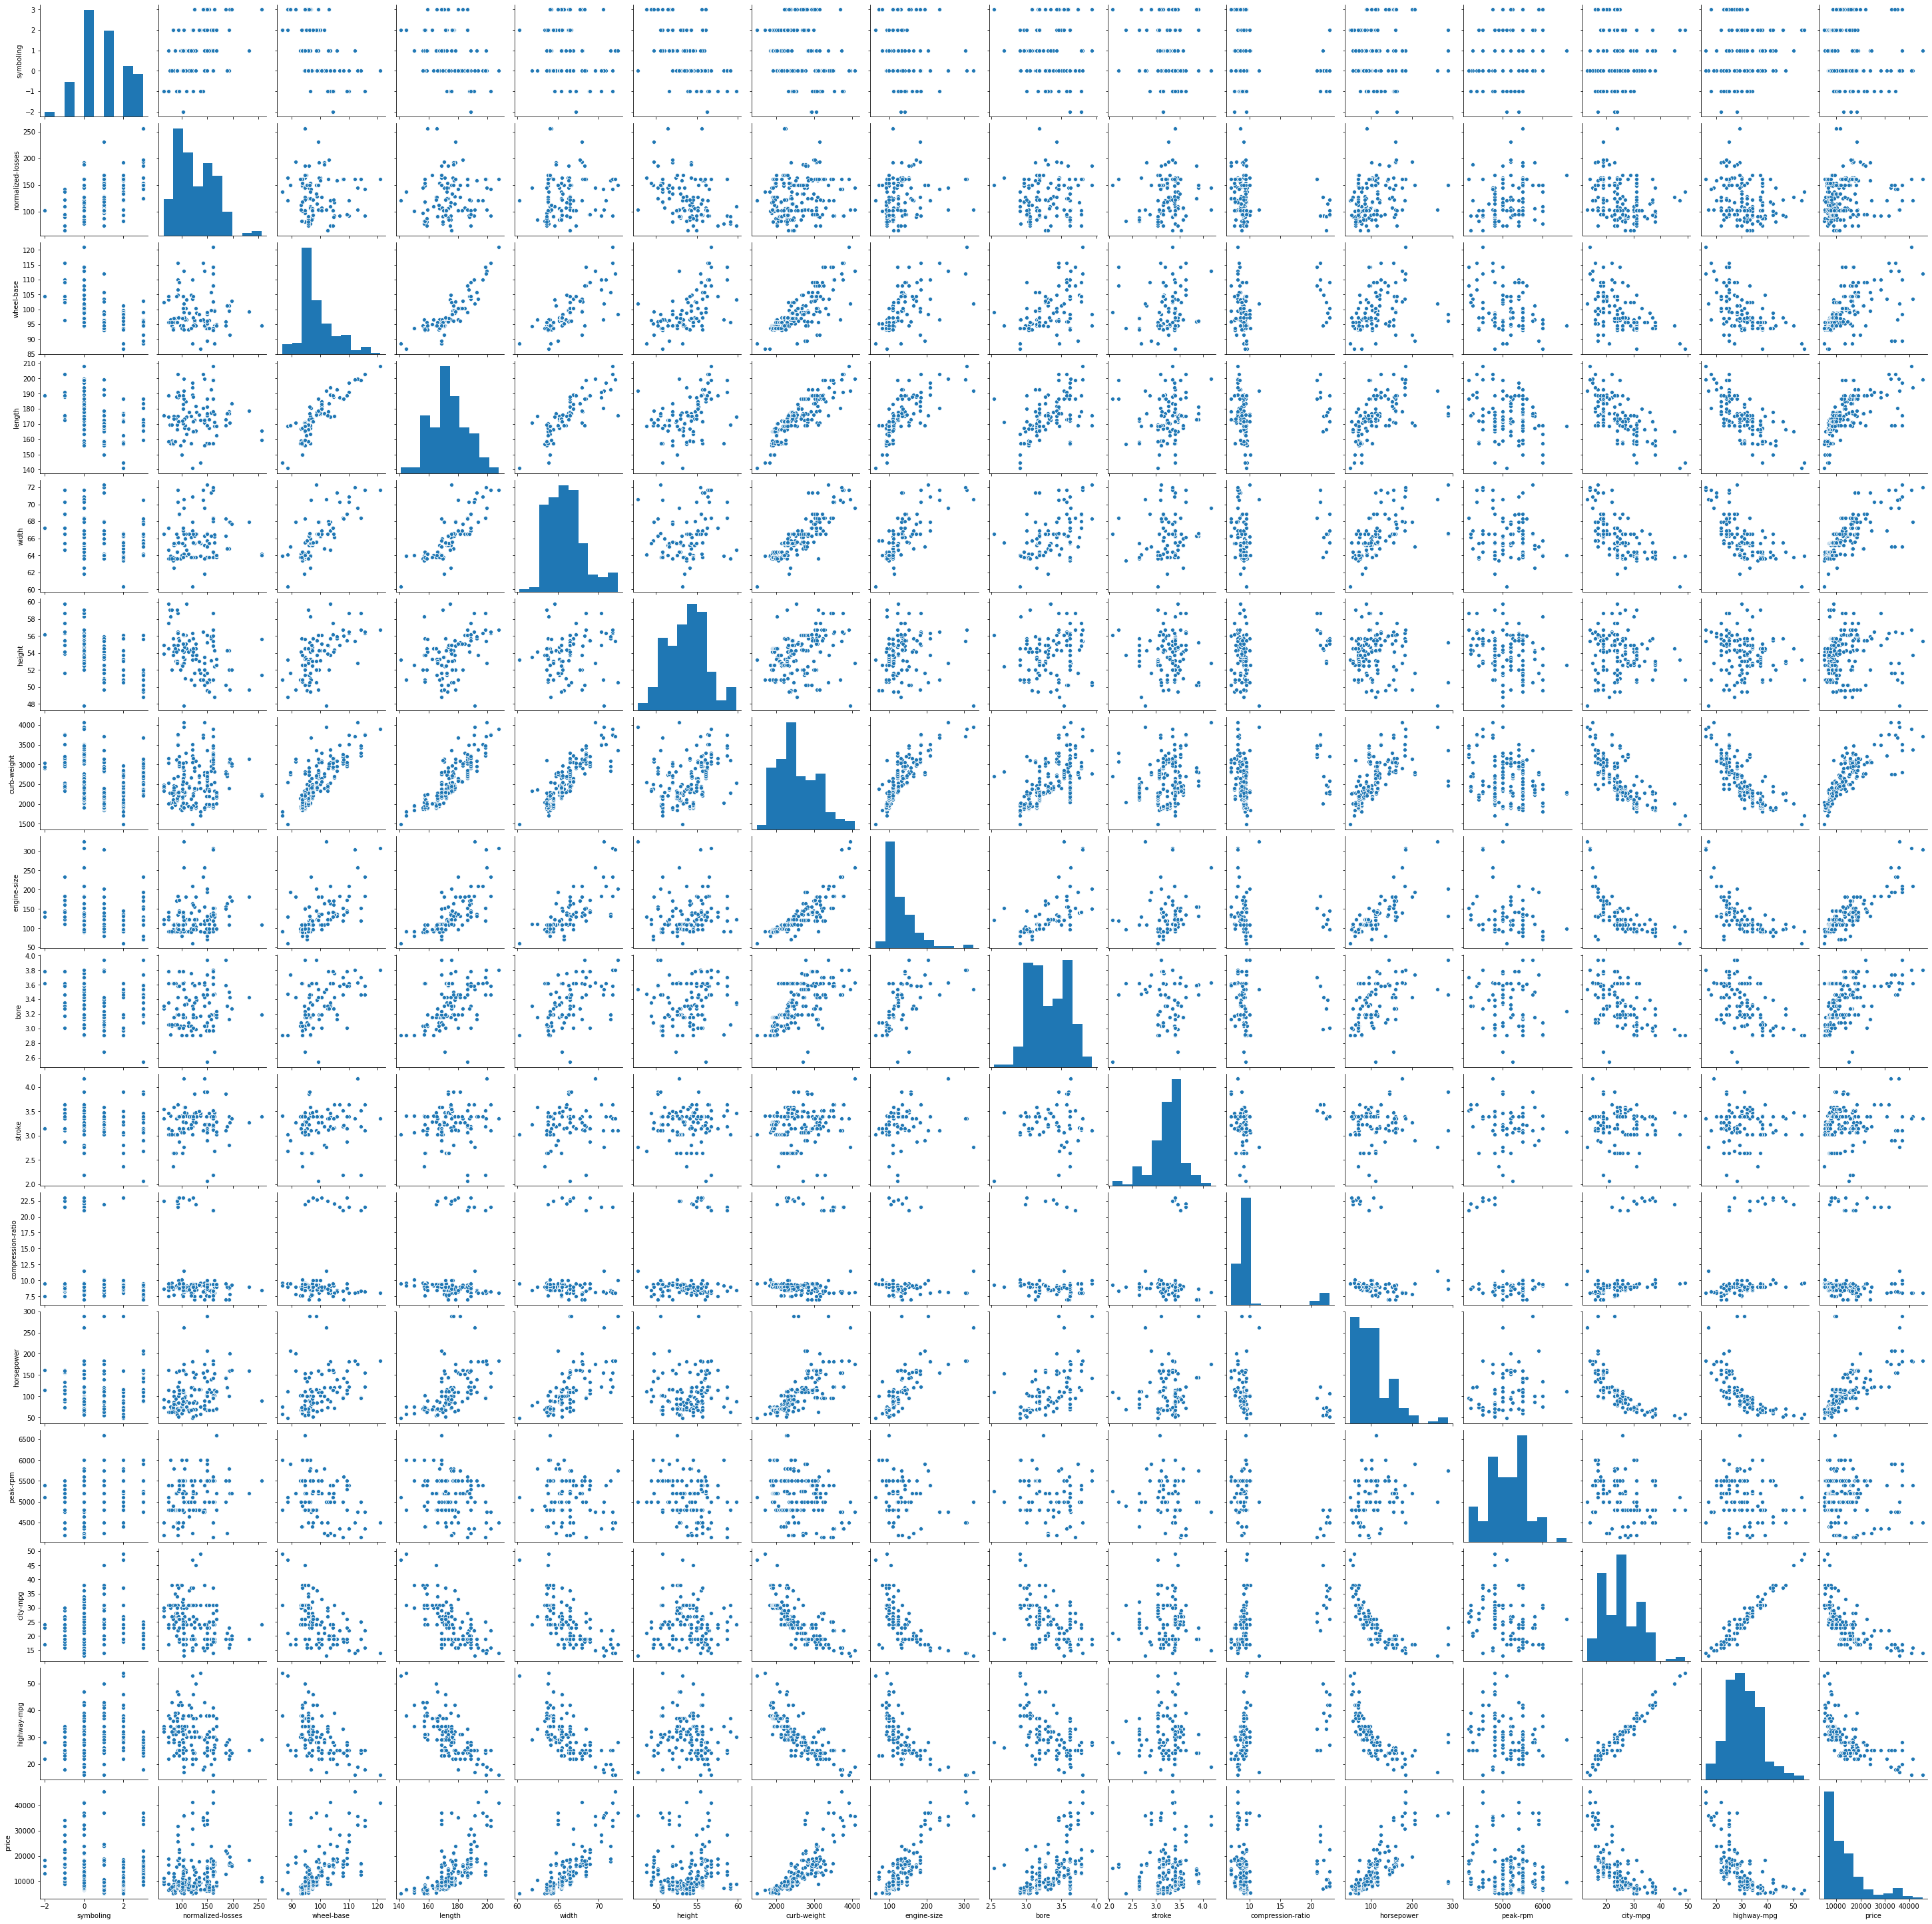

In [44]:
g = sns.pairplot(data)

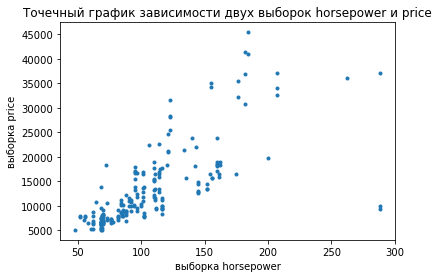

In [45]:
plt.xlabel('выборка horsepower')
plt.ylabel('выборка price')
plt.title('Точечный график зависимости двух выборок horsepower и price')
plt.scatter(data.horsepower, data.price, marker='.')

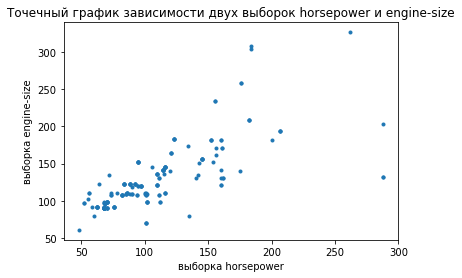

In [46]:
plt.xlabel('выборка horsepower')
plt.ylabel('выборка engine-size')
plt.title('Точечный график зависимости двух выборок horsepower и engine-size')
plt.scatter(data.horsepower, data['engine-size'], marker='.')

# 6. Выдвинуть несколько гипотез по набору имеющихся переменных и проверить эти гипотезы с использованием t-test.

### Гипотеза 1

Гипотеза: цена на автомобили audi отличается от остальной выборки. 
- H0: не имеетя статистического различия между выборками
- H1: выборки значительно отличаются

In [47]:
audi = data[data['make'] == 'audi'].price
others = data[data['make'] != 'audi'].price

In [48]:
descriptives, results = rp.ttest(audi, others)
print(descriptives)
print('_____________________________')
print(results)

   Variable      N          Mean           SD           SE     95% Conf.  \
0     price    7.0  18718.571429  3886.189988  1468.841751  15124.445145   
1     price  198.0  13121.595960  8151.547506   579.305256  11979.160210   
2  combined  205.0  13312.712195  8102.472461   565.901224  12196.946885   

       Interval  
0  22312.697712  
1  14264.031709  
2  14428.477505  
_____________________________
              Independent t-test    results
0  Difference (price - price) =   5596.9755
1          Degrees of freedom =    203.0000
2                           t =      1.8061
3       Two side test p value =      0.0724
4      Difference < 0 p value =      0.9638
5      Difference > 0 p value =      0.0362
6                   Cohen's d =      0.6946
7                   Hedge's g =      0.6920
8               Glass's delta =      1.4402
9                           r =      0.1258


In [49]:
stats.ttest_ind(audi, others)

Ttest_indResult(statistic=1.8060715093373316, pvalue=0.07238838287637711)

p-value > 0.05, поэтому нельзя сказать однозначно о наличии статистического различия между выборками. 

### Гипотеза 2

Гипотеза: цена на автомобили мощностью более 150 л.с. отличается от остальной выборки.

    H0: не имеетя статистического различия между выборками
    H1: выборки значительно отличаются



In [50]:
hp_greater_150 = data[data['horsepower'] >= 150].price
hp_less_150 = data[data['horsepower'] < 150].price

In [51]:
descriptives, results = rp.ttest(hp_greater_150, hp_less_150)
print(descriptives)
print('_____________________________')
print(results)

   Variable      N          Mean            SD           SE     95% Conf.  \
0     price   34.0  24673.823529  10535.825950  1806.879244  20997.700067   
1     price  171.0  11053.777778   5126.844797   392.059621  10279.845536   
2  combined  205.0  13312.712195   8102.472461   565.901224  12196.946885   

       Interval  
0  28349.946991  
1  11827.710019  
2  14428.477505  
_____________________________
              Independent t-test     results
0  Difference (price - price) =   13620.0458
1          Degrees of freedom =     203.0000
2                           t =      11.4605
3       Two side test p value =       0.0000
4      Difference < 0 p value =       1.0000
5      Difference > 0 p value =       0.0000
6                   Cohen's d =       2.1520
7                   Hedge's g =       2.1440
8               Glass's delta =       1.2927
9                           r =       0.6268


In [53]:
stats.ttest_ind(hp_greater_150, hp_less_150)

Ttest_indResult(statistic=11.460460598486332, pvalue=8.969792166860852e-24)

- p value = 0.0000 означает, что существует статистическое различие выборок, принимаем гипотезу Н1.
- Среднее значение выборки с мощностью Л.С. более 150 также больше. Это подтверждает нашу гипотезу. 
- стоит отметить, что в рассматриваемом примере количество автомобилей мощнстью более 150 л.с. значительно меньше (34 против 171). 

# 7. Загрузить результат (в формате .ipynb ноутбука) в репозиторий. Разместить ссылку на репозиторий в лк на сайте.